In [1]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()


import matplotlib.pyplot as plt
%matplotlib inline

# Import the trees from sklearn
from sklearn import tree

# Helper function to split our data
from sklearn.model_selection import train_test_split

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score 

# Helper function for hyper-parameter turning.
from sklearn.model_selection import GridSearchCV

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier 

from sklearn.tree import plot_tree, export_text

# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier


## Main Steps when building a Machine Learning Model. 
1. Inspect and explore data.
2. Select and engineer features.
3. Build and train model.
4. Evaluate model.

# #1 Inspect and explore data.
* Load titanic data
* Visualize all the data using sns.pairplot
* Check for null values

In [2]:
# Load in the titanic data set.
df = pd.read_csv('data/titanic.csv')
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


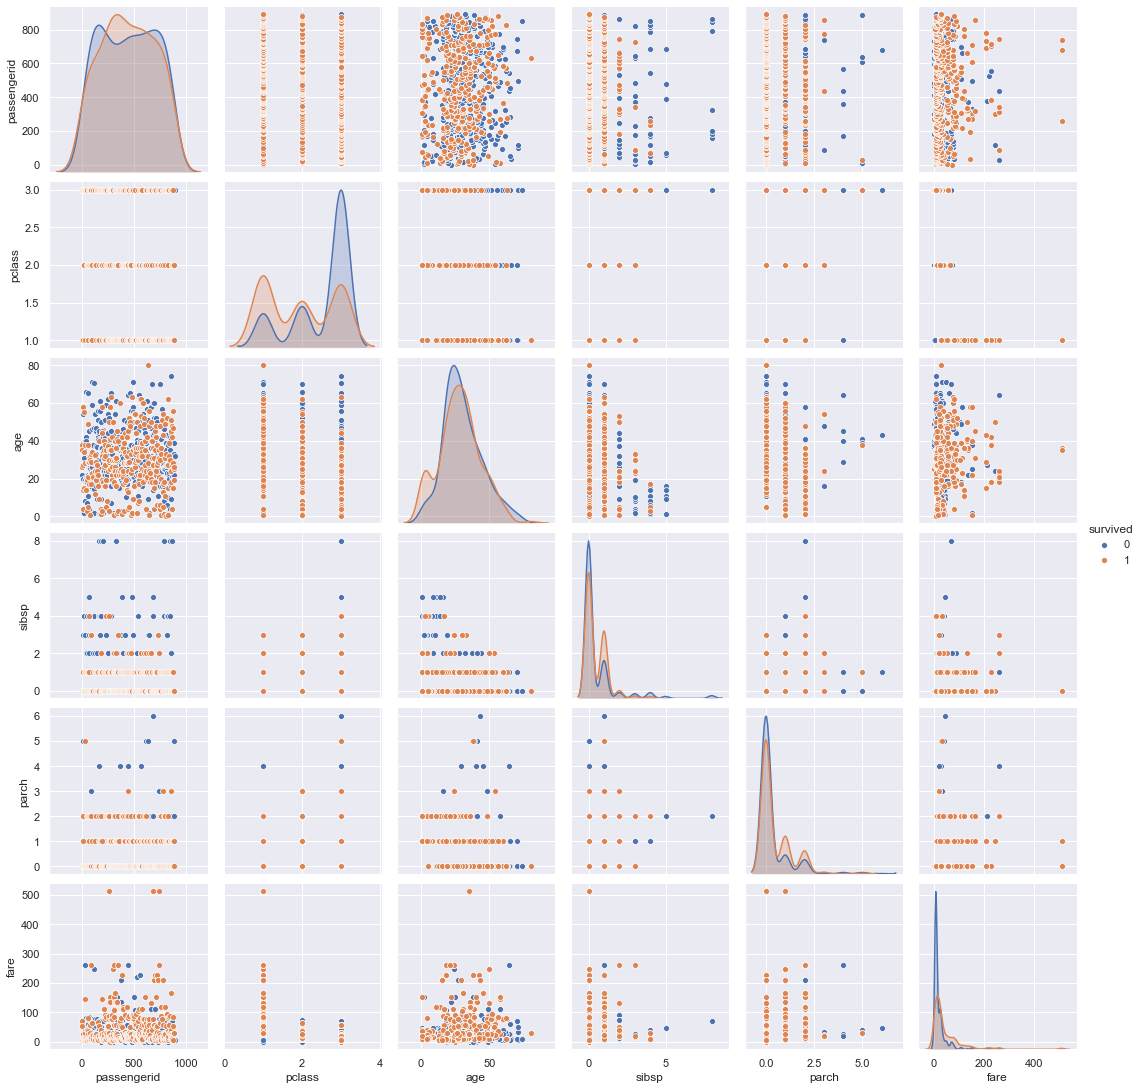

In [3]:
# Visualize all the data using sns.pairplot
sns.pairplot(df, hue='survived');

In [4]:
# Check for null values
df.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

# #2 Select and engineer features.
1. Fill age null values with -999
1. Convert to numerical values if need be by using `pd.get_dummies()`
1. Create a list of the features you are going to use.  In this case use as many or as little as you would like.
1. Define our `X` and `y`
1. Split our data into trainig and testing sets.

In [5]:
# Fill age null values with -999
df['age']=df['age'].fillna(-999)
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# 1. Convert to numerical values if need be by using `pd.get_dummies()`

df = pd.get_dummies(df, columns=['sex', 'pclass', 'embarked'], drop_first=True)

In [7]:
# 2. Create a list of the features we are going to use.
#selected_features = ???
independent_variables = ['fare', 'age',  
                     'sex_male', 'pclass_2', 'pclass_3',  
                     'sibsp', 'parch', 'embarked_Q','embarked_S']

dependent_variable = 'survived'

In [8]:
# Define our `X` and `y`
X = df[independent_variables]

y = df[dependent_variable]


In [9]:
# Split our data into trainig and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=45)

print('Lenght of our Training data:', X_train, '\nLength of our Testing data:', X_test)

Lenght of our Training data:         fare    age  sex_male  pclass_2  pclass_3  sibsp  parch  embarked_Q  \
715   7.6500   19.0      True     False      True      0      0       False   
740  30.0000 -999.0      True     False     False      0      0       False   
187  26.5500   45.0      True     False     False      0      0       False   
338   8.0500   45.0      True     False      True      0      0       False   
488   8.0500   30.0      True     False      True      0      0       False   
..       ...    ...       ...       ...       ...    ...    ...         ...   
845   7.5500   42.0      True     False      True      0      0       False   
790   7.7500 -999.0      True     False      True      0      0        True   
568   7.2292 -999.0      True     False      True      0      0       False   
579   7.9250   32.0      True     False      True      0      0       False   
182  31.3875    9.0      True     False      True      4      2       False   

     embarked_S  
715 

# #3 Build and train model.
1. For our first pass, initialize our model with `max_depth=2`.
2. Fit our model with our training data. 
3. Make predictions of our testing data. 
4. Evaluate and print our model scores using accuracy, precision, recall, f1 scores, and auc scores. 
    * To calculate auc score you have to get the predicted probabilites for the Survived class using `model.predict_proba(X_test)[:,1]`
5. Visualize our Decision Tree using provided code. 


In [10]:
# For our first pass, initialize our model with `max_depth=2`.

model = DecisionTreeClassifier(max_depth=2)

In [11]:
# Fit our model with our training data. 

model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [12]:
# Make predictions of our testing data. 

y_pred = model.predict(X_test)

In [13]:
# 4. Evaluate and print our model scores using accuracy, precision, recall, f1 scores, and auc scores. 
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities
y_pred_proba = model.predict_proba(X_test)

# Keep only the proba for True
y_pred_proba = y_pred_proba[:,1]

# Compute auc score
auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.787709
Precision Score: 0.781818
Recall Score: 0.623188
F1 Score: 0.693548
AUC Score: 0.828590


# Visualize your tree

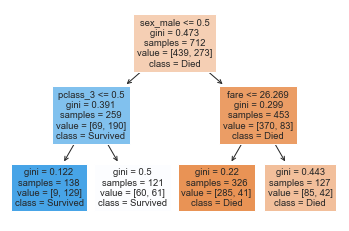

In [14]:
class_names=['Died', 'Survived']
plot_tree(model, feature_names=independent_variables, class_names=class_names, filled=True);

# Picking the right parameters...

# Parameter tuning of your Decision Tree using GridSearch or RandomizedSearch

### For assistance on this, look at Steves TA Tips code in `TA-Tips/random_forest_tuning.ipynb`


1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
1. Initalize your GridSearchCV with a DecisionTreeClassifier, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
1. Fit your GridSearchCV with your training data. 
1. Print the parameters of your best model. 
1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 
1. Visualize your best tree.
1. Which feature was your most important feature?

```python
tree.DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0,
)
```


[Tips on how to customize / set the paramters in the decision tree.](https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use)

In [15]:
# 1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search.from sklearn.model_selection import GridSearchCV
params = {
    'criterion' : ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [5, 10], 
    'max_leaf_nodes': [5, 10]
 }

In [16]:
# 1. Initalize your GridSearchCV with a DecisionTreeClassifier, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
grid_search_cv = GridSearchCV(model, param_grid=params) 

In [17]:
# 1. Fit your GridSearchCV with your training data. 
grid_search_cv.fit(X_train, y_train) 

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [5, 10]})

In [18]:
# 1. Print the parameters of your best model. 
# Print the best parameters it found
print(grid_search_cv.best_estimator_) 

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=5)


In [19]:
# 1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 

# This command gives you the best tree
model = grid_search_cv.best_estimator_

# Now lets evaluate our model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.810056
Precision Score: 0.843137
Recall Score: 0.623188
F1 Score: 0.716667
AUC Score: 0.838340


In [20]:
# 1. Which feature was your most important feature?
# Now lets look at our feature importances
feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
                                       'feature':independent_variables }).sort_values('feature_importance', ascending=False)
feature_imp

,feature_importance,feature
2,0.716381,sex_male
4,0.171607,pclass_3
0,0.112012,fare
1,0.000000,age
3,0.000000,pclass_2
5,0.000000,sibsp
6,0.000000,parch
7,0.000000,embarked_Q
8,0.000000,embarked_S


# Now onto Random Forests...
Were going to do the same with, but this time with a random forest. Remeber... Repetition is the father of learning.

1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
1. Initalize your GridSearchCV with a RandomForestClassifer, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
1. Fit your GridSearchCV with your training data. 
1. Print the parameters of your best model. 
1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 
1. Which feature was your most important feature?


# Parameters of the Random Forest Classifier

```python
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
```

In [24]:
# 1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
param_rf = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [5, 10, 15], 
    'max_leaf_nodes': [5, 10, 15]
 }

In [25]:
# 1. Initalize your GridSearchCV or RandomizedSearchCV with a RandomForestClassifer, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.

grid_search_rf = GridSearchCV(RandomForestClassifier(),param_grid=param_rf, scoring='accuracy', cv=5)

In [26]:
# 1. Fit your GridSearchCV with your training data. 
grid_search_rf.fit(X_train, y_train) 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [5, 10, 15]},
             scoring='accuracy')

In [29]:
# 1. Print the parameters of your best model. 
# Print the best parameters it found

print(grid_search_rf.best_estimator_) 




RandomForestClassifier(max_depth=15, max_features=None, max_leaf_nodes=15)


In [28]:
# 1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 

# This command gives you tree that has the highest f1-score. 
model = grid_search_rf.best_estimator_


# Now lets evaluate our model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = model.predict_proba(X_test)[:,1]

auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.787709
Precision Score: 0.803922
Recall Score: 0.594203
F1 Score: 0.683333
AUC Score: 0.856522


In [31]:
# 1. Which feature was your most important feature?
# Now lets look at our feature importances
feature_imp = pd.Series(model.feature_importances_,index=independent_variables).sort_values(ascending=False)
feature_imp

sex_male      0.538121
fare          0.172838
pclass_3      0.126214
age           0.094347
sibsp         0.033522
parch         0.016515
embarked_S    0.008635
pclass_2      0.008190
embarked_Q    0.001617
dtype: float64

# Build a random forest using the ny-vs-sf-housing.csv data. 
* Your target variable, aka the column you are trying to predict, aka your `y` variable is `in_sf`. 
* Can you get an accuracy above %88.8889?
* What was your most important feature?


In [32]:
df = pd.read_csv('data/ny-vs-sf-houses.csv')
df.head()

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,0,2.0,1.0,999000,1960,1000,999,10
1,0,2.0,2.0,2750000,2006,1418,1939,0
2,0,2.0,2.0,1350000,1900,2150,628,9
3,0,1.0,1.0,629000,1903,500,1258,9
4,0,0.0,1.0,439000,1930,500,878,10


In [33]:
# BUILD, TRAIN, AND EVAULATE A RANDOM FOREST MODEL BELOW. 

def inspect_dataframe(input_df):
    print(input_df.describe())
    print("NULLS: " + str(input_df.isnull().sum()))
    print("DUPLICATES: " + str(input_df.duplicated().sum()))
    return "That gooood stuff."

inspect_dataframe(df)

            in_sf        beds        bath         price   year_built  \
count  492.000000  492.000000  492.000000  4.920000e+02   492.000000   
mean     0.544715    2.155488    1.905691  2.020696e+06  1959.103659   
std      0.498503    1.305133    1.068150  2.824055e+06    40.579602   
min      0.000000    0.000000    1.000000  1.875180e+05  1880.000000   
25%      0.000000    1.000000    1.000000  7.490000e+05  1924.000000   
50%      1.000000    2.000000    2.000000  1.145000e+06  1960.000000   
75%      1.000000    3.000000    2.000000  1.908750e+06  2001.000000   
max      1.000000   10.000000   10.000000  2.750000e+07  2016.000000   

              sqft  price_per_sqft   elevation  
count   492.000000      492.000000  492.000000  
mean   1522.989837     1195.632114   39.845528  
std    1014.366252      733.765622   44.673248  
min     310.000000      270.000000    0.000000  
25%     832.750000      730.500000   10.000000  
50%    1312.000000      960.000000   18.500000  
75%    1

'That gooood stuff.'

In [34]:
independent_variables = ['beds', 'bath',  
                     'price', 'year_built', 'sqft',  
                     'price_per_sqft', 'elevation']

dependent_variable = 'in_sf'

In [35]:
X= df[independent_variables]
y= df[dependent_variable]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=45)

print('Lenght of our Training data:', X_train, '\nLength of our Testing data:', X_test)

Lenght of our Training data:      beds  bath     price  year_built  sqft  price_per_sqft  elevation
22    4.0   5.0  13750000        2016  3699            3717         10
61    1.0   1.0    649000        1965   750             865         10
135   4.0   4.0  13150000        2016  3338            3939         15
442   3.0   3.5   2195000        1922  2168            1012        125
271   1.0   1.0    985000        1978   884            1114         11
..    ...   ...       ...         ...   ...             ...        ...
234   4.0   4.0   4300000        2006  3321            1295         10
393   5.0   3.0    950000        1939  1846             515         97
199   2.0   2.0   2175000        1999  1569            1386         10
156   2.0   1.0   1475000        1973   971            1519         10
232   1.0   1.0    798000        1926   769            1038         10

[393 rows x 7 columns] 
Length of our Testing data:      beds  bath     price  year_built  sqft  price_per_sqft  eleva

In [38]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(oob_score=True)

model.fit(X_train, y_train)

# Now lets evaluate our model
y_pred = model.predict(X_test)


## Eval Model 
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities
y_pred_proba = model.predict_proba(X_test)

# # Keep only the proba for True
y_pred_proba = y_pred_proba[:,1]

# Compute auc score
auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)


Accuracy Score: 0.919192
Precision Score: 0.896552
Recall Score: 0.962963
F1 Score: 0.928571
AUC Score: 0.987654


In [39]:
feature_imp = pd.Series(model.feature_importances_,index=independent_variables).sort_values(ascending=False)
feature_imp

elevation         0.349228
price_per_sqft    0.246505
price             0.107641
sqft              0.107014
year_built        0.101151
beds              0.053163
bath              0.035299
dtype: float64

# Awesome difficult extra credit below:
Build a classifier using the adult_income.csv data.  
* The target variable is 'class'
* Start with just using these features `selected_features = ['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']`
* You have to include the pos_label in your precision, recall, and f1 scores. It just tells the classifier which one is the posotive label.  I provided the proper way below.

* See if you can get above 50% f1 score.  
* See some [super tricks and tips here](https://www.kaggle.com/code/jieyima/income-classification-model)

In [23]:
df = pd.read_csv('data/adult_income.csv')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
